In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-cgpa-lpa/placement (1).csv


In [3]:
df = pd.read_csv('/kaggle/input/placement-cgpa-lpa/placement (1).csv')

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'PACKAGE')

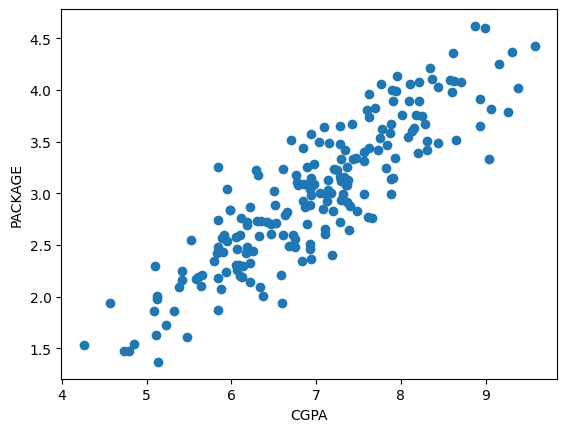

In [6]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
X = df.drop(columns = ['package'], axis=1)
y = df['package']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
X_train.shape

(160, 1)

In [12]:
y_train.shape

(160,)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)

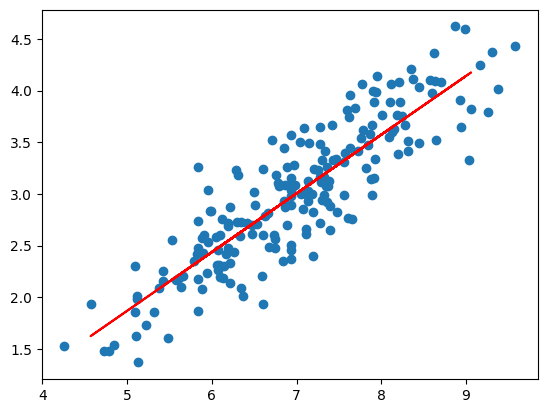

In [22]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_test, lr.predict(X_test), color='red')

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error 

In [19]:
print(mean_absolute_error(y_test, y_pred))

0.2293233677091689


#  Mean Squared Error

In [23]:
print(mean_squared_error(y_test, y_pred))

0.08649257007712616


# Root Mean Squared Error

In [24]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.2940961918779741


# R2 Score

In [25]:
print(r2_score(y_test, y_pred))

0.7784780420332373


# Adjusted R2 Score

In [26]:
r2 = r2_score(y_test, y_pred)

In [27]:
1 - ( ((1-r2) * (X_test.shape[0] - 1)) / (X_test.shape[0] - 1 - 1) )

0.7726485168235857

## Adjusted R2 Score decreases with adding irrelevant input feature where as R2 score does not get affected by it 